In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Create the synthetic data as presented in paper
D = np.random.randint(0, 2, (500, 500))
N = np.random.normal(loc=0, scale=0.1, size=(500, 500))
A_0_1 = D + N

In [18]:
import numpy as np
from scipy.linalg import svd
import itertools

def calculate_pij(A, alpha):
    A_norm_1 = np.linalg.norm(A, 1)
    A_norm_F = np.linalg.norm(A, 'fro')
    pij = alpha * np.abs(A) / A_norm_1 + (1 - alpha) * np.square(A) / A_norm_F**2
    pij /= np.sum(pij)  # Normalize probabilities
    return pij

def calculate_xi(A, alpha):
    A_norm_1 = np.linalg.norm(A, 1)
    A_norm_F = np.linalg.norm(A, 'fro')
    xi = A_norm_F**2 / (alpha * A_norm_F**2 /( np.abs(A) * A_norm_1) + (1 - alpha))
    return xi

def rho2_alpha(A, alpha):
    xi = calculate_xi(A, alpha)
    max_row_sum = np.max(np.sum(xi, axis=1))
    max_col_sum = np.max(np.sum(xi, axis=0))
    U, s, Vh = svd(A)
    sigma_min = np.min(s)
    return max(max_row_sum, max_col_sum) - sigma_min**2

def gamma_alpha(A, alpha):
    A_norm_1 = np.linalg.norm(A, 1)
    A_norm_F = np.linalg.norm(A, 'fro')
    max_val = np.max(A_norm_1 / (alpha + (1 - alpha) * np.abs(A) * A_norm_1 / A_norm_F**2))
    return max_val + np.linalg.norm(A, 2)

def find_alpha_star(A, epsilon):
    alphas = np.linspace(0.001, 1, 1000)
    f_alpha = [rho2_alpha(A, alpha) + gamma_alpha(A, alpha) * epsilon * np.linalg.norm(A, 2) / 3 for alpha in alphas]
    alpha_star = alphas[np.argmin(f_alpha)]
    return alpha_star

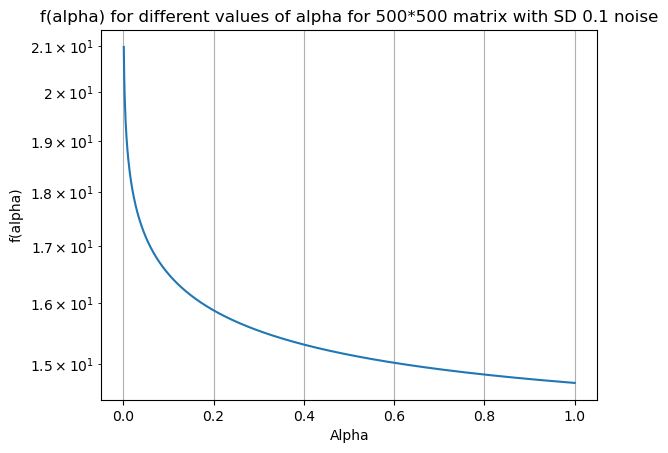

In [14]:
import matplotlib.pyplot as plt

def plot_f_alpha(A, epsilon):
    alphas = np.linspace(0.001, 1, 1000)
    f_alpha = [rho2_alpha(A, alpha) + gamma_alpha(A, alpha) * epsilon * np.linalg.norm(A, 'fro')**2 / 3 for alpha in alphas]

    plt.plot(alphas, np.log(f_alpha))
    plt.yscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('f(alpha)')
    plt.title('f(alpha) for different values of alpha for 500*500 matrix with SD 0.1 noise')
    plt.grid(True)
    plt.show()
    
epsilon = 0.1
plot_f_alpha(A_0_1, epsilon)

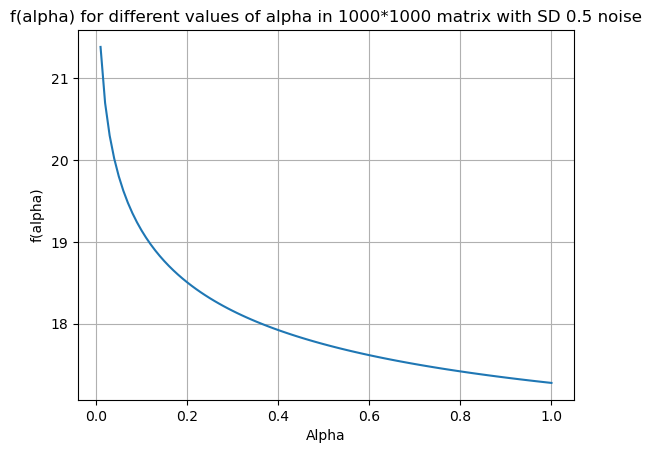

In [15]:
D2 = np.random.randint(0, 2, (1000, 1000))
N2= np.random.normal(loc=0, scale=0.5, size=(1000, 1000))
A_0_2 = D2 + N2


import matplotlib.pyplot as plt

def plot_f_alpha(A, epsilon):
    alphas = np.linspace(0.01, 1, 100)
    f_alpha = [rho2_alpha(A, alpha) + gamma_alpha(A, alpha) * epsilon * np.linalg.norm(A, 'fro')**2 / 3 for alpha in alphas]

    plt.plot(alphas, np.log(f_alpha))
    plt.xlabel('Alpha')
    plt.ylabel('f(alpha)')
    plt.title('f(alpha) for different values of alpha in 1000*1000 matrix with SD 0.5 noise')
    plt.grid(True)
    plt.show()
    
epsilon = 0.1
plot_f_alpha(A_0_2, epsilon)

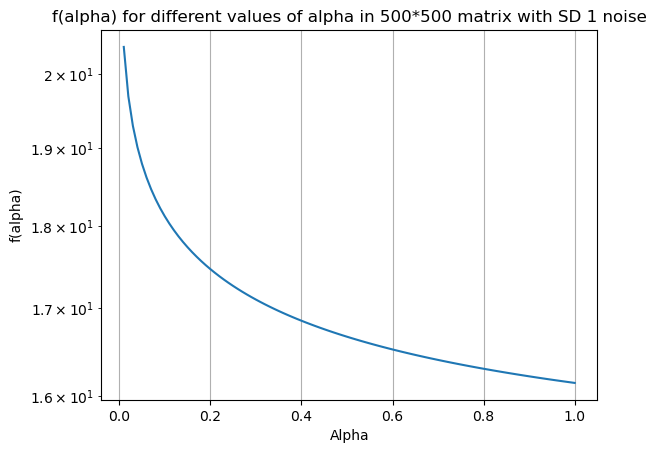

In [19]:
D2 = np.random.randint(0, 2, (500, 500))
N2= np.random.normal(loc=0, scale=1, size=(500, 500))
A_0_2 = D2 + N2


import matplotlib.pyplot as plt

def plot_f_alpha(A, epsilon):
    alphas = np.linspace(0.01, 1, 100)
    f_alpha = [rho2_alpha(A, alpha) + gamma_alpha(A, alpha) * epsilon * np.linalg.norm(A, 'fro')**2 / 3 for alpha in alphas]

    plt.plot(alphas, np.log(f_alpha))
    plt.yscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('f(alpha)')
    plt.title('f(alpha) for different values of alpha in 500*500 matrix with SD 1 noise')
    plt.grid(True)
    plt.show()
    
epsilon = 0.1
plot_f_alpha(A_0_2, epsilon)